# データの確認用ワーク
```
description
ball                       513    :ボール
blocked_ball                38  :
called_strike              273  :見逃しストライク
foul                       277   :ファール
foul_bunt                    1
foul_tip                    20   :ファールチップ
hit_by_pitch                 3  :デッドボール
hit_into_play              250 :打ち返し
intent_ball                  2
swinging_strike            186 :空振りストライク
swinging_strike_blocked     14
```

In [6]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.9 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=82337c028742d71dffd467f8999fd96e6e2be04321c5e6f819f48f7b9ff04db4
  Stored in directory: /Users/shirai1/Library/Caches/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

plt.rcParams['figure.subplot.bottom'] = 0.2
plt.rcParams['lines.linewidth'] = 3

import japanize_matplotlib

In [43]:
players = ['Darvish_Yu', 'Kikuchi_Yusei', 'Maeda_Kenta', 'Ohtani_Shohei']
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [44]:
strikes = ['called_strike', 'swinging_strike', 'swinging_strike_blocked']
hit_into_plays = ['hit_into_play']

In [117]:
results = {}
for player in players:
    results[player] = {}
    print(player)
    target_data = '/Users/shirai1/work/baseball_analysis/data_collection/data/baseball_savant/' + player + '.csv'
    df = pd.read_csv(target_data)
    
    exist_years = []
    release_x_means = []
    release_z_means = []
    release_extension_means = []
    
    release_x_strike_means = []
    release_z_strike_means = []
    release_extension_strike_means = []
    
    release_x_hit_into_play_means = []
    release_z_hit_into_play_means = []
    release_extension_hit_into_play_means = []
    
    #### 対象期間のリリースポイントの平均
    for year in years:
        tmp_df = df[(df['game_date'] >= year + '-04-01') & (df['game_date'] <= str(int(year) + 1) + '-3-31')]
        if len(tmp_df) == 0:
            continue
        if player == 'Kikuchi_Yusei' and year == '2018':
            continue
        if player == 'Ohtani_Shohei' and year in ('2017', '2019'):
            continue
        exist_years.append(year)
            
        release_x_mean = tmp_df['release_pos_x'].mean()
        release_z_mean = tmp_df['release_pos_z'].mean()
        release_extension_mean = tmp_df['release_extension'].mean()
        print('{}: x: {} z: {} extention: {}'.format(year, release_x_mean, release_z_mean, release_extension_mean))
        release_x_means.append(release_x_mean)
        release_z_means.append(release_z_mean)
        release_extension_means.append(release_extension_mean)
        
        release_x_strike_means.append(tmp_df[tmp_df['description'].isin(strikes)]['release_pos_x'].mean())
        release_z_strike_means.append(tmp_df[tmp_df['description'].isin(strikes)]['release_pos_z'].mean())
        release_extension_strike_means.append(tmp_df[tmp_df['description'].isin(strikes)]['release_extension'].mean())
        #print(release_x_strike_mean, release_z_strike_mean, release_extension_strike_mean)
        
        release_x_hit_into_play_means.append(tmp_df[tmp_df['description'].isin(hit_into_plays)]['release_pos_x'].mean())
        release_z_hit_into_play_means.append(tmp_df[tmp_df['description'].isin(hit_into_plays)]['release_pos_z'].mean())
        release_extension_hit_into_play_means.append(tmp_df[tmp_df['description'].isin(hit_into_plays)]['release_extension'].mean())
        #print(release_x_hit_into_play_mean, release_z_hit_into_play_mean, release_extension_hit_into_play_mean)
    results[player] = {
        'year': exist_years, 
        'release_x_mean': release_x_means,
        'release_z_mean': release_z_means,
        'release_extension_mean': release_extension_means,
        'release_x_strike_mean': release_x_strike_means,
        'release_z_strike_mean': release_z_strike_means,
        'release_extension_strike_mean': release_extension_strike_means,
        'release_x_hit_into_play_mean': release_x_hit_into_play_means,
        'release_z_hit_into_play_mean': release_z_hit_into_play_means,
        'release_extension_hit_into_play_mean': release_extension_hit_into_play_means
    }

Darvish_Yu
2018: x: -2.3152094090648307 z: 5.559173838209983 extention: 6.022289156626505
2020: x: -1.6620525242223354 z: 5.851353901070882 extention: 6.327027027027028
2021: x: -1.8772905591200735 z: 5.682654445462878 extention: 6.426837763519709
2022: x: -2.173454951600893 z: 5.470282948622487 extention: 6.616753536857781
Kikuchi_Yusei
2020: x: 2.271671632896305 z: 5.711081644815256 extention: 6.716577221228384
2021: x: 2.0201182197496523 z: 5.5927909133055165 extention: 6.7545201668984705
2022: x: 1.7108556759840274 z: 5.488459783228751 extention: 6.85219623502567
Maeda_Kenta
2018: x: -2.112946635730858 z: 5.8162157772621805 extention: 5.784338747099768
2020: x: -2.2783737776168054 z: 5.835132198478813 extention: 5.929590727997103
2021: x: -2.265954929577465 z: 5.88010704225352 extention: 5.876732394366198
Ohtani_Shohei
2018: x: -2.244630715123095 z: 5.974736225087924 extention: 6.357444314185228
2020: x: -1.9508400569530138 z: 6.055519696250593 extention: 6.769563152896486
2021: x:

# 年ごとのリリースポイントのx,z,extensionの散布図

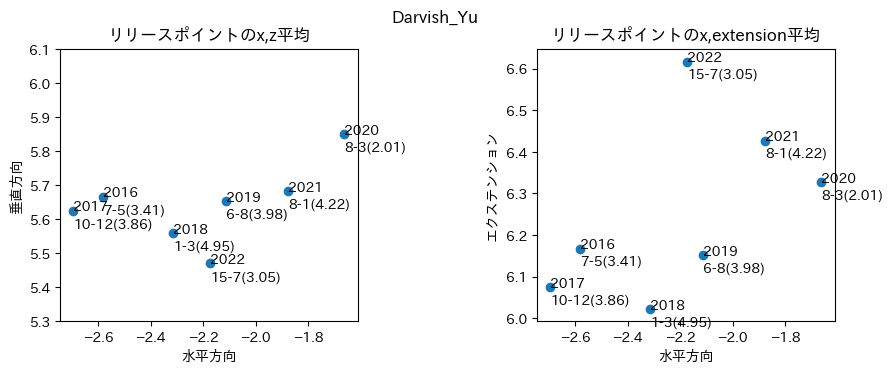

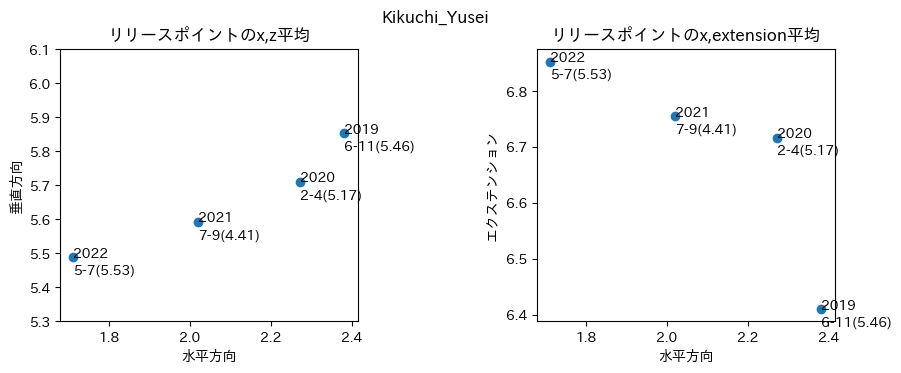

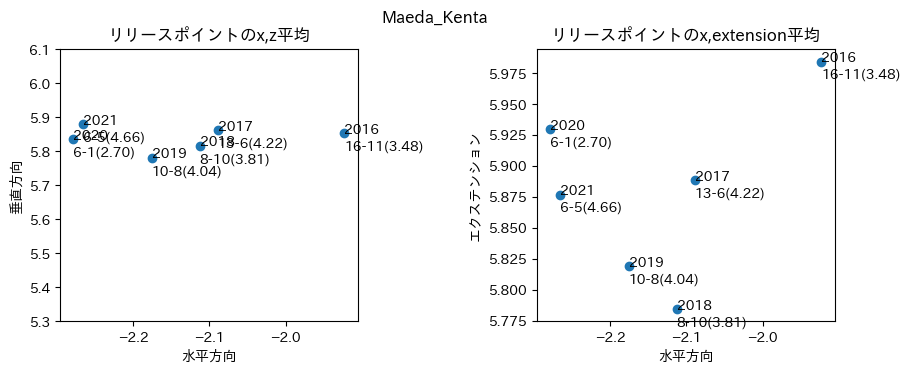

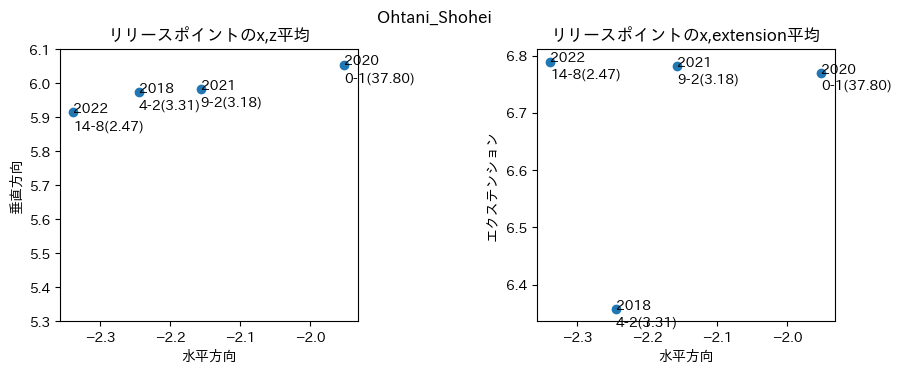

In [114]:
players = ['Darvish_Yu', 'Kikuchi_Yusei', 'Maeda_Kenta', 'Ohtani_Shohei']

for player in players:
    if player == 'Darvish_Yu':
        player_results = ['7-5(3.41)', '10-12(3.86)', '1-3(4.95)', '6-8(3.98)', '8-3(2.01)', '8-1(4.22)', '15-7(3.05)']
    elif player == 'Kikuchi_Yusei': #2019~2022
        player_results = ['6-11(5.46)', '2-4(5.17)', '7-9(4.41)', '5-7(5.53)']
    elif player == 'Maeda_Kenta': # 2016~2021
        player_results = ['16-11(3.48)', '13-6(4.22)', '8-10(3.81)', '10-8(4.04)', '6-1(2.70)', '6-5(4.66)']
    elif player == 'Ohtani_Shohei': # 2018, 2020~2022
        player_results = ['4-2(3.31)', '0-1(37.80)', '9-2(3.18)', '14-8(2.47)']
        
    x = np.array(results[player]['release_x_mean'])
    z = np.array(results[player]['release_z_mean'])
    extension = np.array(results[player]['release_extension_mean'])
    years = np.array(results[player]['year'])
    
    fig = plt.figure(figsize =(10, 4))
    plt.subplots_adjust(wspace=0.6, hspace=0.6)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_ylim([5.3, 6.1])
    ax1.scatter(x, z)

    diff_size = 0.05  # (max(z) - min(z)) / 10
    for i, _ in enumerate(x):
        ax1.text(x[i], z[i], years[i])
        ax1.text(x[i], z[i]-diff_size, player_results[i])
    
    ax1.set_title("リリースポイントのx,z平均")
    ax1.set_xlabel('水平方向')
    ax1.set_ylabel('垂直方向')
    
    ax2 = fig.add_subplot(1, 2, 2)
    # ax2.set_ylim([5.3, 6.1])
    ax2.scatter(x, extension)

    diff_size = (max(extension) - min(extension)) / 15
    for i, _ in enumerate(x):
        ax2.text(x[i], extension[i], years[i])
        ax2.text(x[i], extension[i]-diff_size, player_results[i])
    
    ax2.set_title("リリースポイントのx,extension平均")
    ax2.set_xlabel('水平方向')
    ax2.set_ylabel('エクステンション')
    
    fig.suptitle(f"{player}")
    
    plt.show()

In [131]:
# 年ごとのストライク/当てられた別リリースポイントのx,z,extensionの散布図

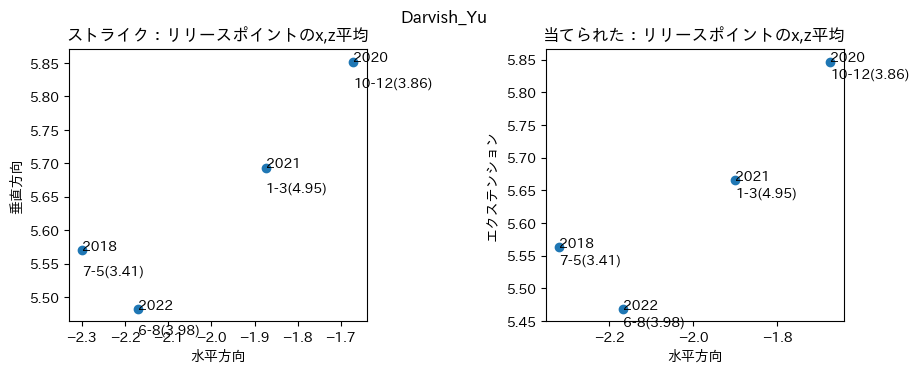

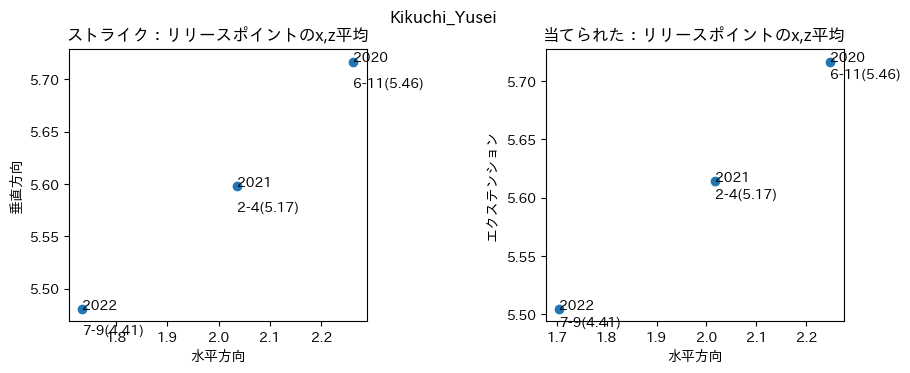

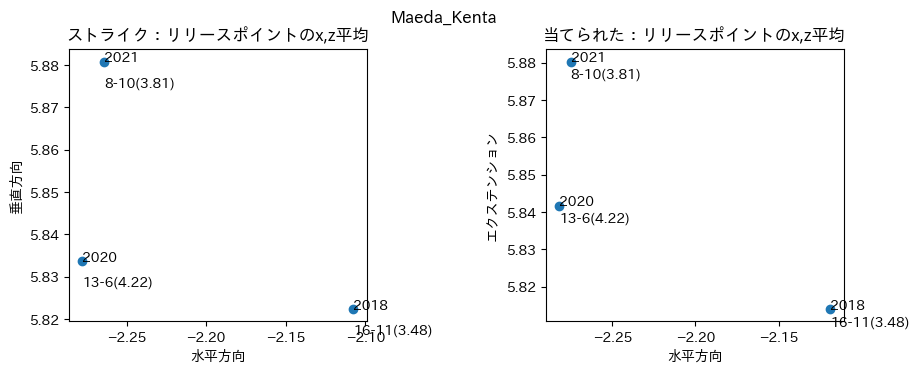

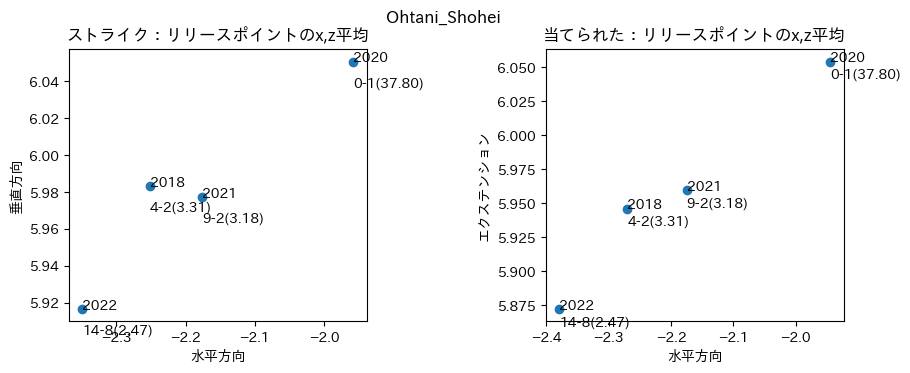

In [132]:
players = ['Darvish_Yu', 'Kikuchi_Yusei', 'Maeda_Kenta', 'Ohtani_Shohei']

for player in players:
    if player == 'Darvish_Yu':
        player_results = ['7-5(3.41)', '10-12(3.86)', '1-3(4.95)', '6-8(3.98)', '8-3(2.01)', '8-1(4.22)', '15-7(3.05)']
    elif player == 'Kikuchi_Yusei': #2019~2022
        player_results = ['6-11(5.46)', '2-4(5.17)', '7-9(4.41)', '5-7(5.53)']
    elif player == 'Maeda_Kenta': # 2016~2021
        player_results = ['16-11(3.48)', '13-6(4.22)', '8-10(3.81)', '10-8(4.04)', '6-1(2.70)', '6-5(4.66)']
    elif player == 'Ohtani_Shohei': # 2018, 2020~2022
        player_results = ['4-2(3.31)', '0-1(37.80)', '9-2(3.18)', '14-8(2.47)']
        
    x_strike = np.array(results[player]['release_x_strike_mean'])
    z_strike = np.array(results[player]['release_z_strike_mean'])
    extension_strike = np.array(results[player]['release_extension_strike_mean'])
    x_hit_into_play = np.array(results[player]['release_x_hit_into_play_mean'])
    z_hit_into_play = np.array(results[player]['release_z_hit_into_play_mean'])
    extension_hit_into_play = np.array(results[player]['release_extension_hit_into_play_mean'])
    years = np.array(results[player]['year'])
    
    fig = plt.figure(figsize =(10, 4))
    plt.subplots_adjust(wspace=0.6, hspace=0.6)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.scatter(x_strike, z_strike)

    diff_size = (max(z_strike) - min(z_strike)) / 10
    for i, _ in enumerate(x_strike):
        ax1.text(x_strike[i], z_strike[i], years[i])
        ax1.text(x_strike[i], z_strike[i]-diff_size, player_results[i])
    
    ax1.set_title("ストライク：リリースポイントのx,z平均")
    ax1.set_xlabel('水平方向')
    ax1.set_ylabel('垂直方向')
    
    ax2 = fig.add_subplot(1, 2, 2)
    # ax2.set_ylim([5.3, 6.1])
    ax2.scatter(x_hit_into_play, z_hit_into_play)

    diff_size = (max(z_hit_into_play) - min(z_hit_into_play)) / 15
    for i, _ in enumerate(x_hit_into_play):
        ax2.text(x_hit_into_play[i], z_hit_into_play[i], years[i])
        ax2.text(x_hit_into_play[i], z_hit_into_play[i]-diff_size, player_results[i])
    
    ax2.set_title("当てられた：リリースポイントのx,z平均")
    ax2.set_xlabel('水平方向')
    ax2.set_ylabel('エクステンション')
    
    fig.suptitle(f"{player}")
    
    plt.show()

### ある試合のある球種における回転数とリリースポイントの関係

In [160]:
tmp_df2 = tmp_df[tmp_df['game_date'] > '2022-04-01']

In [161]:
tmp_df2.groupby('pitch_type').size()

pitch_type
CU    216
FC    181
FF    701
FS    306
SI     65
SL    883
dtype: int64

In [163]:
kinds = ['SL', 'FC', 'FS', 'FF']

for kind in kinds:
    print(f'{kind}, num:{len(tmp_df2[tmp_df2["pitch_type"] == kind])}')
    print(tmp_df2[(tmp_df2['description'].isin(strikes)) & (tmp_df2['pitch_type'] == kind)]['release_pos_z'].mean())
    print(tmp_df2[(tmp_df2['description'].isin(strikes)) & (tmp_df2['pitch_type'] == kind)]['release_spin_rate'].mean())
    
    print(tmp_df2[(tmp_df2['description'].isin(hit_into_plays)) & (tmp_df2['pitch_type'] == kind)]['release_pos_z'].mean())
    print(tmp_df2[(tmp_df2['description'].isin(hit_into_plays)) & (tmp_df2['pitch_type'] == kind)]['release_spin_rate'].mean())

SL, num:883
5.779494382022472
2488.89606741573
5.732173913043478
2509.68115942029
FC, num:181
5.800869565217391
2390.978260869565
5.749354838709676
2419.0967741935483
FS, num:306
6.158505747126435
1263.2298850574712
6.1136842105263165
1259.8684210526317
FF, num:701
5.9225146198830405
2210.5147928994083
5.915984251968505
2206.15873015873


In [165]:
tmp_df2[(tmp_df2['description'].isin(strikes)) & (tmp_df2['pitch_type'] == 'FS')][['release_pos_z', 'release_spin_rate']]

,release_pos_z,release_spin_rate
9,6.24,1353.0
25,5.97,1096.0
29,6.09,1191.0
37,6.14,1303.0
334,6.22,1013.0
335,6.20,1071.0
381,6.06,1271.0
461,6.01,1261.0
498,6.21,1083.0
522,6.18,1351.0


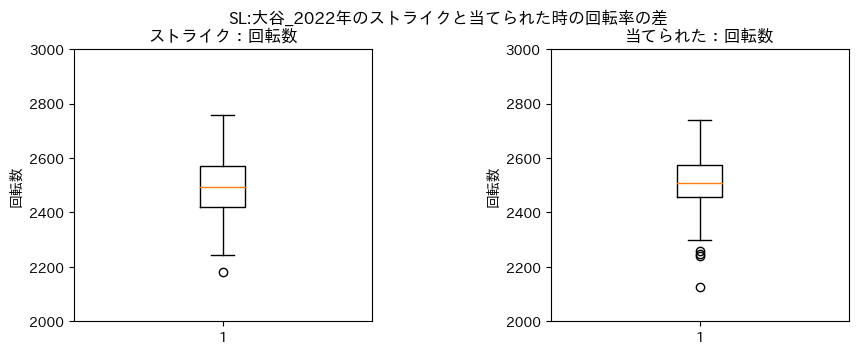

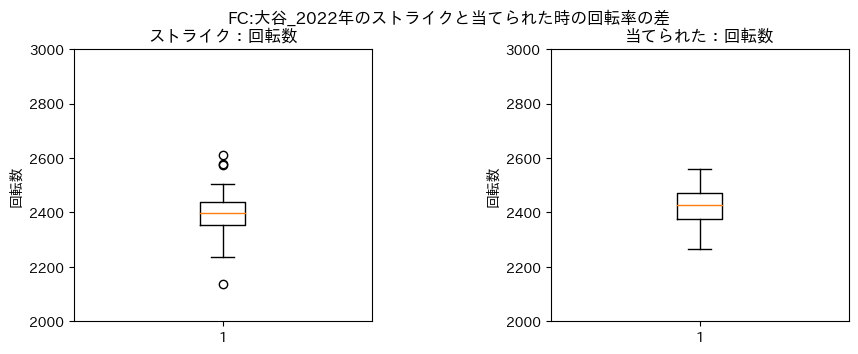

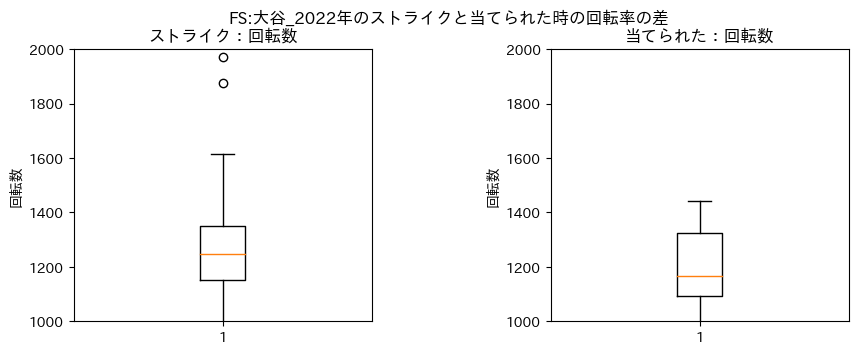

In [180]:
kinds = ['SL', 'FC', 'FS']

for kind in kinds:
    fig = plt.figure(figsize =(10, 4))
    plt.subplots_adjust(wspace=0.6, hspace=0.6)

    ax1 = fig.add_subplot(1, 2, 1)
    release_spin_rates = tmp_df2[(tmp_df2['description'].isin(strikes)) & (tmp_df2['pitch_type'] == kind)]['release_spin_rate']
    ax1.boxplot(release_spin_rates)
    ax1.set_title("ストライク：回転数")
    ax1.set_ylabel('回転数')
    if kind == 'FS':
        ax1.set_ylim([1000, 2000])
    else:
        ax1.set_ylim([2000, 3000])

    ax2 = fig.add_subplot(1, 2, 2)
    release_spin_rates = tmp_df2[(tmp_df2['description'].isin(hit_into_plays)) & (tmp_df2['pitch_type'] == kind)]['release_spin_rate']
    ax2.boxplot(release_spin_rates)
    ax2.set_title("当てられた：回転数")
    ax2.set_ylabel('回転数')
    if kind == 'FS':
        ax2.set_ylim([1000, 2000])
    else:
        ax2.set_ylim([2000, 3000])

    fig.suptitle('{}:大谷_2022年のストライクと当てられた時の回転率の差'.format(kind))

    plt.show()